# Research assignment 4

John Adeleke

Educational attainment and health insurance coverage in urban and rural Nigeria

03/11/2024

In [1]:
eststo clear

In [2]:
cd "/Users/johnadeleke/Desktop/Stats2/soc211_assignment" 

/Users/johnadeleke/Desktop/Stats2/soc211_assignment


In [3]:
set more off

(-set more- irrelevant in this version of Stata)


log using "Log for Research Assignment4.log", replace

In [4]:
set maxvar 120000

In [5]:
use /Users/johnadeleke/Desktop/Stats2/soc211_assignment/NGIR7BDT/NGIR7BFL.DTA

In [6]:
use v106 v025 v481 using "NGIR7BDT/NGIR7BFL.DTA", clear

In [7]:
describe v106 v025 v481


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
v106            byte    %8.0g      V106       highest educational level
v025            byte    %8.0g      V025       type of place of residence
v481            byte    %8.0g      V481       covered by health insurance


In [8]:
codebook v106 v025 v481


-------------------------------------------------------------------------------
v106                                                  highest educational level
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: V106

                 Range: [0,3]                         Units: 1
         Unique values: 4                         Missing .: 0/41,821

            Tabulation: Freq.   Numeric  Label
                       14,398         0  no education
                        6,383         1  primary
                       16,698         2  secondary
                        4,342         3  higher

-------------------------------------------------------------------------------
v025                                                 type of place of residence
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: V

In [9]:
tab v106 
tab v025 
tab v481


     highest |
 educational |
       level |      Freq.     Percent        Cum.
-------------+-----------------------------------
no education |     14,398       34.43       34.43
     primary |      6,383       15.26       49.69
   secondary |     16,698       39.93       89.62
      higher |      4,342       10.38      100.00
-------------+-----------------------------------
       Total |     41,821      100.00

    type of |
   place of |
  residence |      Freq.     Percent        Cum.
------------+-----------------------------------
      urban |     16,984       40.61       40.61
      rural |     24,837       59.39      100.00
------------+-----------------------------------
      Total |     41,821      100.00

 covered by |
     health |
  insurance |      Freq.     Percent        Cum.
------------+-----------------------------------
         no |     40,704       97.33       97.33
        yes |      1,117        2.67      100.00
------------+--------------------------------

In [10]:
pwcorr v106 v025


             |     v106     v025
-------------+------------------
        v106 |   1.0000 
        v025 |  -0.3653   1.0000 


## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least one hypothesis involving one of the two following types of interactions
        
    A. I hypothesize that the effect of education on health insurance coverage may differ for women in urban areas compared to those in rural areas. 
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
  
  Educational attainment: The predicted direction of association is positive. In other words, women with higher educational attainment are more likely to have health insurance coverage. As educational level increases, rate of health insurance coverage increases as well.
  
  Type of place of residence: The predicted direction of association will also be positive. That is, women living in urban areas are more likely to covered by health insurance than those living in rural areas. 
  
    2) the interaction of the 2 indendent variables
    
  2. Women with higher education that reside in urban areas are more likely to have health insurance coverage than other women in Nigeria
      
    3) you can predict that there is no association
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions

3&C). Health insurance coverage is crucial for better health outcomes and lessening the burden of health expenditure. However, there is an uneven distribution of health insurance coverage in Nigeria. Most existing studies evaluate the effect of health insurance coverage on educational attainment (Chen & Jin, 2012; Carlo et al., 2016; Zou & Cheng, 2023), but very few investigate how educational attainment shapes health insurance coverage. Based on past studies on socioeconomic resources (including education) and health insurance coverage, we can predict that there is an association between my dependent and independent variables.
       
 

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [11]:
eststo: reg v481 v106 v025 


      Source |       SS           df       MS      Number of obs   =    41,821
-------------+----------------------------------   F(2, 41818)     =    578.23
       Model |  29.2561593         2  14.6280797   Prob > F        =    0.0000
    Residual |  1057.90981    41,818  .025297953   R-squared       =    0.0269
-------------+----------------------------------   Adj R-squared   =    0.0269
       Total |  1087.16597    41,820  .025996317   Root MSE        =    .15905

------------------------------------------------------------------------------
        v481 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        v106 |   .0223014   .0008003    27.87   0.000     .0207328      .02387
        v025 |  -.0135529   .0017013    -7.97   0.000    -.0168874   -.0102184
       _cons |   .0201522   .0033137     6.08   0.000     .0136573    .0266472
--------------------------------------------------

In [12]:
eststo: reg v481 i.v106##i.v025 


      Source |       SS           df       MS      Number of obs   =    41,821
-------------+----------------------------------   F(7, 41813)     =    334.07
       Model |  57.5820492         7  8.22600702   Prob > F        =    0.0000
    Residual |  1029.58392    41,813  .024623536   R-squared       =    0.0530
-------------+----------------------------------   Adj R-squared   =    0.0528
       Total |  1087.16597    41,820  .025996317   Root MSE        =    .15692

------------------------------------------------------------------------------
        v481 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        v106 |
    primary  |   .0013147   .0044282     0.30   0.767    -.0073646    .0099941
  secondary  |   .0187174   .0034477     5.43   0.000     .0119597     .025475
     higher  |   .1310573   .0041428    31.64   0.000     .1229373    .1391772
             |
        v025 |
     

In [13]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (v106 "Education" v025 "Residence") noconstant


--------------------------------------------
                      (1)             (2)   
                  Model 1            est2   
                     b/se            b/se   
--------------------------------------------
Education           0.022***                
                  (0.001)                   
Residence          -0.014***                
                  (0.002)                   
1.v106                              0.001   
                                  (0.004)   
2.v106                              0.019***
                                  (0.003)   
3.v106                              0.131***
                                  (0.004)   
2.v025                             -0.005   
                                  (0.003)   
1.v106#2~025                       -0.003   
                                  (0.005)   
2.v106#2~025                       -0.010*  
                                  (0.004)   
3.v106#2~025                       -0.033***
         

In [14]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [15]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).



Variables that uniquely identify margins: v106 v025


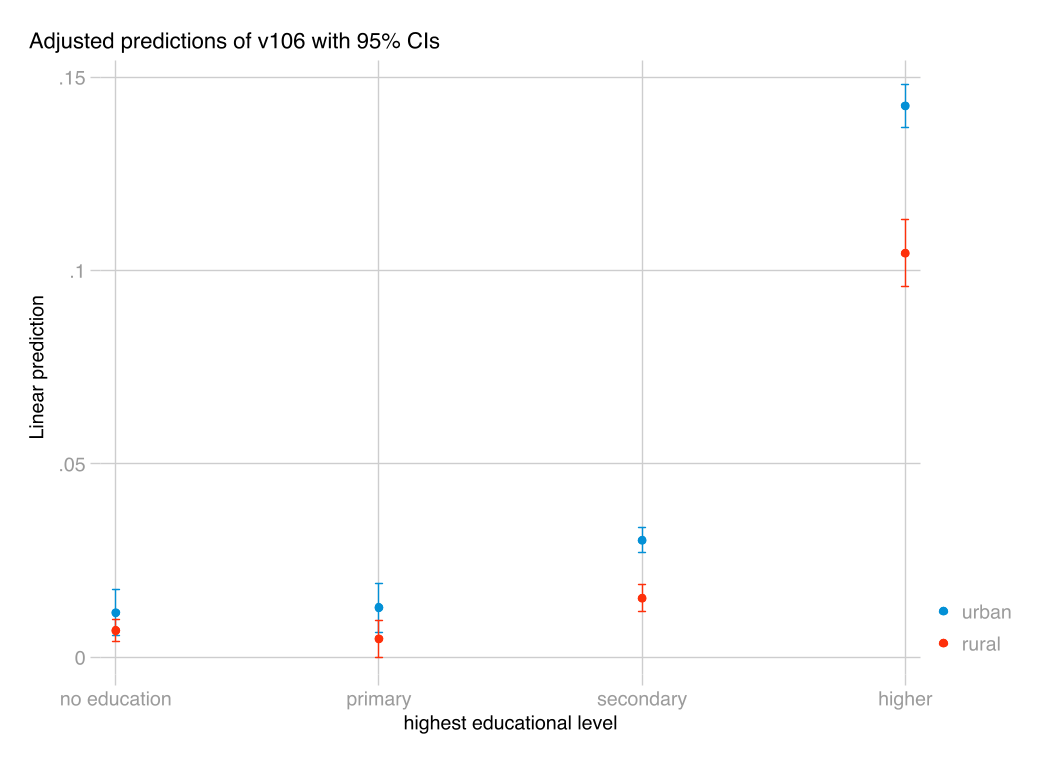

In [16]:
quietly reg v481 i.v106##i.v025 
quietly margins i.v106, over(v025) atmeans
marginsplot, recast(scatter) scheme(538w)

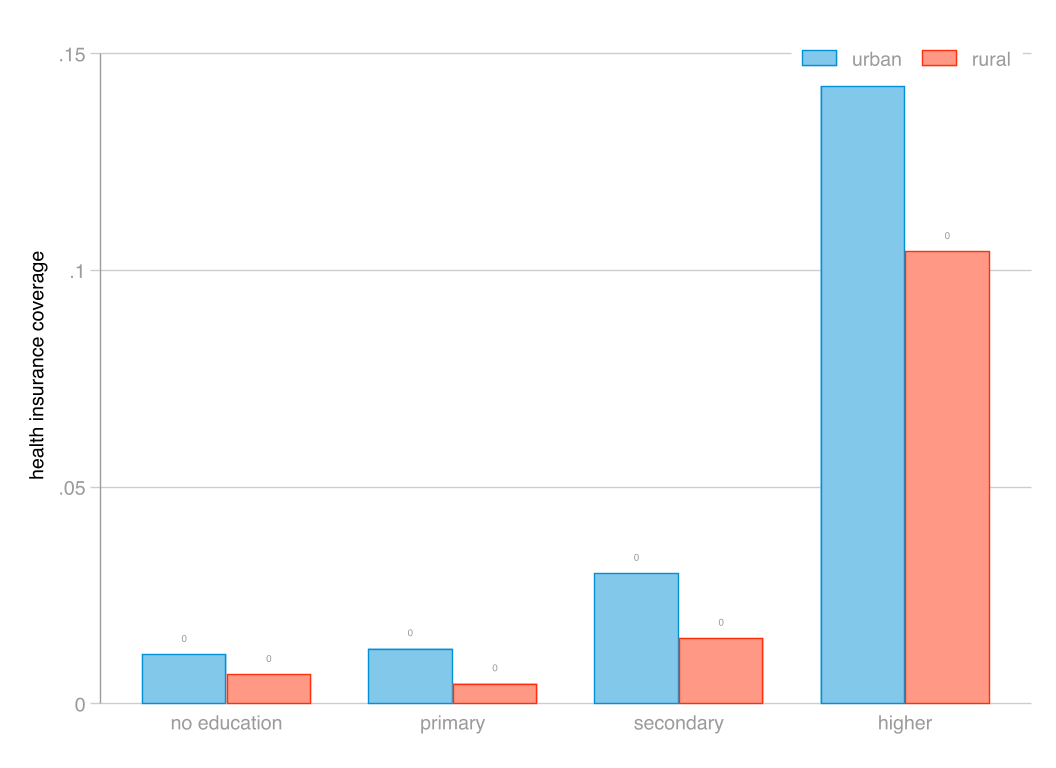

In [17]:
graph bar v481, over(v025) over(v106) asyvars ytitle (health insurance coverage ) ///
  blabel(bar, format(%7.0fc)) legend(rows(1) position(1) ring(0)) scheme(538w)

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
    
    A. It appears that the output support my hypothesis that Women with higher education that reside in urban areas are more likely to have health insurance coverage than other women in Nigeria. We can see that number of women with health insurance coverage increases as their level of education advances, and higher number for those in urban areas.
    
    B. Why do the regression coefficients support or contradict your hypotheses?
    
 B. The regression coefficients support my hypotheses as evident in the significantly low p-values (-0.033,  0.022, -0.014). 
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?
    
    C. The regression adjusted estimates from the margins for nominal categories supports my hypotheses because as level of education increases, the chance of having health insurance subscription also increase even when I included type of place of residence in the model. 
    